# Gradient Descent

How deep learning models learn:
1. Guess solution
2. Compute error
3. Learn from mistakes and modify the parameters


Gradient Descent is an optimization algorithm used to minimize a function iteratively. It's commonly used in machine learning and data science to optimize loss functions, which measure the discrepancy between the predicted and actual outcomes of a model.
The goal of gradient descent is to find the values of the model's parameters (weights and biases) that minimize a loss function. The loss function measures the difference between the predicted output of the model and the actual output.

Gradient descent works by taking steps in the direction of the negative gradient of the loss function. The gradient of a function is a vector that points in the direction of steepest ascent of the function. In the case of gradient descent, we want to take steps in the direction of steepest descent, which means in the direction of the smallest possible change to the model's parameters.

Here's a step-by-step explanation of how Gradient Descent works:

1. Initialize the parameters of the model randomly. These parameters will be updated iteratively to minimize the loss function.

2. Calculate the gradient of the loss function with respect to each parameter. The gradient is a vector that points in the direction of the steepest increase of the function. It's calculated using calculus, specifically the chain rule for differentiation.

3. Update the parameters by taking a step in the direction opposite to the gradient. This is done because we want to decrease the loss function, not increase it. The size of the step is determined by the learning rate, a hyperparameter that you set before training the model.

4. Repeat steps 2 and 3 until the algorithm converges to a minimum, i.e., the change in loss function is smaller than a predefined threshold, or a maximum number of iterations is reached.

## Types of Gradient Descent

There are several different types of gradient descent algorithms. The most common types are:

- **Batch gradient descent**: This is the simplest type of gradient descent. It updates the parameters after evaluating the loss function on the entire training set.
- **Stochastic gradient descent (SGD)**: This is a more efficient type of gradient descent that updates the parameters after evaluating the loss function on a single training example.
- **Mini-batch gradient descent**: This is a compromise between batch gradient descent and SGD. It updates the parameters after evaluating the loss function on a small number of training examples (typically 10 to 100).

It's important to note that Gradient Descent assumes the function to be optimized is convex, i.e., it has a single global minimum. If the function has multiple local minima, the algorithm may get stuck in a local minimum and fail to find the global minimum.

## Learning Rate

An important parameter in gradient descent is the learning rate. The learning rate controls how much the parameters are updated in each step. A small learning rate will cause the algorithm to converge slowly, while a large learning rate may cause it to overshoot the minimum and oscillate around it.

The optimal learning rate depends on the specific problem and the gradient descent algorithm being used. It is often necessary to experiment with different values of the learning rate to find the one that works best.

## Regularization

In some cases, gradient descent may converge to a local minimum that is not the global minimum. Regularization is a technique that can help to prevent this problem. Regularization adds a penalty term to the loss function that discourages the model from becoming too complex. This can help to ensure that the model generalizes well to unseen data.

## Example
Minimize the error, function below

Example:
$$ f(x) = 3x^2 - 3x + 4$$
$$ f'(x) = 6x -3 $$

Solve the equation $0 = 6x - 3$ the point where derivative is 0 (minimum or maximum).

Minimize it with gradient descent algorithm:
- Initialize random guess of minimum
- Loop over training iterations
    - Compute derivative at guess min
    - Updated guess min is itself minus derivative scaled by learning rate 


## Local minimum
Gradient descent is guaranteed to go downhill, but can get stuck in local minima.
In 2D you can visualize, but larger dimensions are impossible to plot.

Unknown why it works. There might be many local minima.

## Gradient descent in 1D

Find minimum of $f(x) = 3x^2 - 3x + 4$ and its derivative $ f'(x) = 6x - 3$

Plot the function and its derivative.

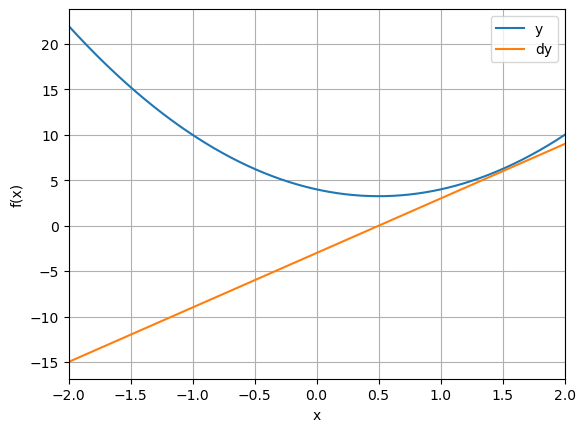

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# function
def fx(x):
    return 3*x**2 - 3*x + 4

# derivative
def deriv(x):
    return 6*x - 3

# plot the function
x = np.linspace(-2,2,2001)

plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])


Text(0.5, 1.0, 'Empirical local minimum: 0.4980601982166257')

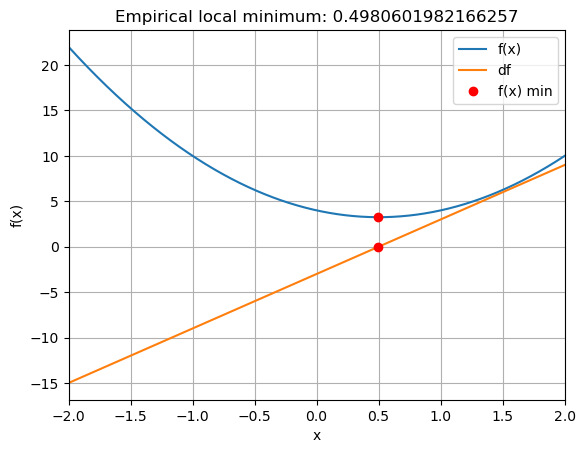

In [3]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = 0.01
training_epochs = 100

# gradient descent
for i in range(training_epochs):
    grad = deriv(localmin) # gradient at our current location, value of the derivative
    localmin = localmin - learning_rate*grad # update our location by taking a step in the direction of the gradient

#plot results

plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: %s' %localmin[0])

## Store the value of every epoch

Text(0, 0.5, 'Derivative')

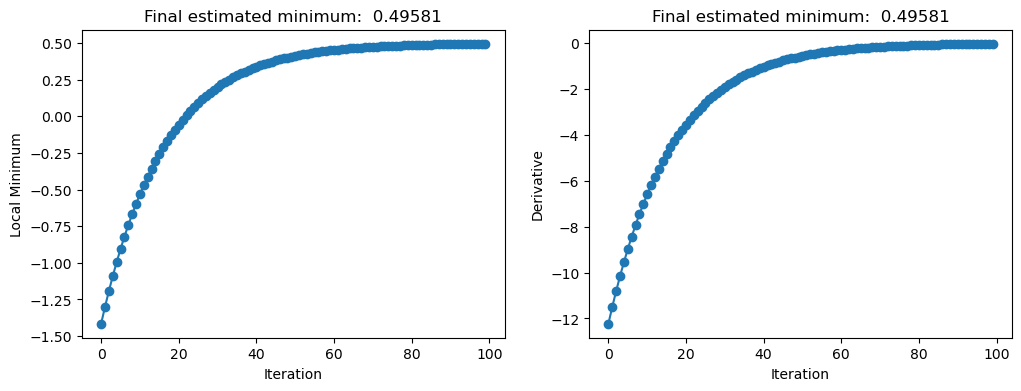

In [6]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = 0.01
training_epochs = 100

modelparams = np.zeros((training_epochs,2))

for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin[0],grad[0]

fig, ax = plt.subplots(1,2, figsize=(12,4))

for i in range(2):
    ax[i].plot(modelparams[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {localmin[0]: .5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')


## Gradient descent 2D

$f(x,y) = 3(1-x)^2e^{-x^2-(y+1)^2} - 10(\frac{x}{5} - x^3 - y^5)e^{-x^2 - y^2} - \frac{1}{3} e^{-(x+1)^2-y^2}$

(201, 201)


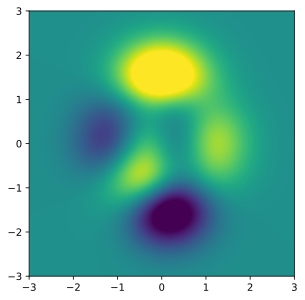

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

def peaks(x,y):
    x,y = np.meshgrid(x,y)

    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) - 1/3 * np.exp(-(x+1)**2 - y**2)
    return z

x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')


In [ ]:
# create derivatives
sx, sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2 - sy**2) - 1/3 * sym.exp(-(sx+1)**2 - sy**2)

# generate functions from derivative
df_x = sym.lambdify((sx,sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx,sy), sym.diff(sZ,sy), 'sympy')

print(df_x(1,1).evalf())
print(df_x(1,1))

-1.07369833656079
-8*exp(-2) + 1.33333333333333*exp(-5)


In [ ]:
# random starting point
localmin = np.random.rand(2)*4-2
startpnt = localmin[:]

learning_rate = .01
trainign_epochs = 1000

trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([df_x(localmin[0], localmin[1]).evalf(),
                     df_y(localmin[0], localmin[1]).evalf()])
    localmin = localmin - learning_rate*grad
    trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[-2.00499044570028 -1.53452560475851]
[-1.50928489 -1.39337795]


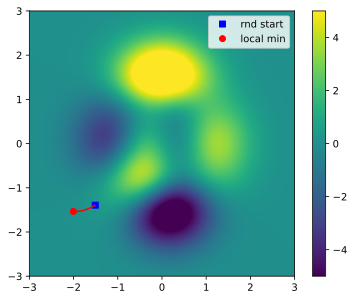

In [ ]:
# visualization
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
